In [2]:
import os
os.chdir('E:\\PYTHON\\web_scrapping')

In [ ]:
#Web Scrapping

In [ ]:
## 3 Popular Tools and Libraries used for Web Scraping in Python

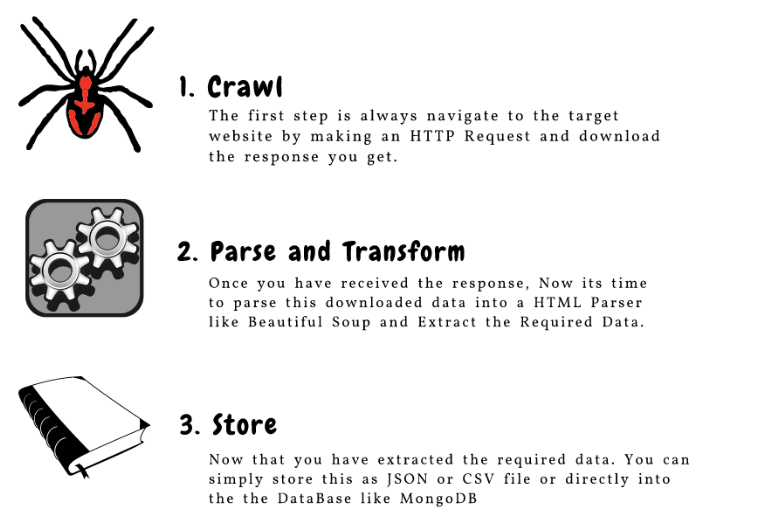

In [4]:
from IPython.display import Image
Image('3_main_component.png')

In [5]:
"""
Web Scraping - Beautiful Soup
"""

# importing required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# target URL to scrap
url = "https://www.goibibo.com/hotels/hotels-in-shimla-ct/"

# headers
headers = {
    'User-Agent': "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36"
    }

# send request to download the data
response = requests.request("GET", url, headers=headers)

# parse the downloaded data
data = BeautifulSoup(response.text, 'html.parser')
print(data)

<!DOCTYPE html>
<html><head><title>Hotels in Shimla - Book 790 Shimla Hotels with 𝘂𝗽𝘁𝗼 𝟱𝟬% off @ ₹196</title><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width, initial-scale=1.0" name="viewport"/><meta content="Best Shimla Hotels with upto 50% off from Goibibo. Check 52690 reviews and 38801 photos for 790  Shimla Hotels. Use coupon code GETSETGO and grab best deals starting from  @ ₹196 on Shimla online hotel booking. ✔ Lowest Price Guarantee ✔ Fastest Booking ✔ Instant Refund" name="description"/><meta content="width=device-width,initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/><meta content="hotels in Shimla, best hotels in Shimla, Shimla hotels, Shimla hotel booking, Shimla hotel price, Shimla hotel deals, book Shimla hotels, goibibo Shimla hotels" name="keywords"/><link href="//www.goibibo.com/images/favicon.ico" rel="shortcut icon" type="image/ico"/><meta content="Hotels in Shimla -  Book 790  Shim

In [6]:
# find all the sections with specifiedd class name
cards_data = data.find_all('div', attrs={'class', 'width100 fl htlListSeo hotel-tile-srp-container hotel-tile-srp-container-template new-htl-design-tile-main-block'})

# total number of cards
print('Total Number of Cards Found : ', len(cards_data))

# source code of hotel cards
for card in cards_data:
    print(card)

Total Number of Cards Found :  10
<div class="width100 fl htlListSeo hotel-tile-srp-container hotel-tile-srp-container-template new-htl-design-tile-main-block" id="htl-8833337098196373625" onclick="window.open('https://www.goibibo.com/hotels/marina-shimla-first-designer-boutique-hotel-in-shimla-8833337098196373625/');event.stopPropagation();"><div class="hotel-tile-srp-container-img-container"><div class="htl-tile-free-bkfst-overlay"><div class="text-label">Free breakfast</div><div class="label-decor"></div></div><div class="hotel-tile-srp-container-title-image"><img class="lazy" id="htl-tile-main-image-8833337098196373625" onload="pagespeed.CriticalImages.checkImageForCriticality(this);" ori="https://cdn1.goibibo.com/marina-shimla-first-designer-boutique-hotel-shimla-exterior-128415489726-jpeg-g.jpg" pagespeed_url_hash="116042952" src="https://cdn1.goibibo.com/marina-shimla-first-designer-boutique-hotel-shimla-exterior-128415489726-jpeg-g.jpg"/></div><ul class="hotel-tile-srp-containe

In [7]:
# extract the hotel name and price per room
for card in cards_data:

    # get the hotel name
    hotel_name = card.find('p')

    # get the room price
    room_price = card.find('li', attrs={'class': 'htl-tile-discount-prc'})
    print(hotel_name.text, room_price.text)

Marina- Shimla First Designer Boutique Hotel 8100
landmark shimla - With Elevator Access To Mall Road 2880
Hotel Baljees Regency 2310
Amritara The Zion Hotel 3700
Hotel Prestige 1500
Hotel Combermere 6150
Hotel Willow Banks 7380
Hotel Dalziel 1365
de exotica crest 2750
Hotel Dhroov 4000


In [9]:
# create a list to store the data
scraped_data = []

for card in cards_data:

    # initialize the dictionary
    card_details = {}

    # get the hotel name
    hotel_name = card.find('p')

    # get the room price
    room_price = card.find('li', attrs={'class': 'htl-tile-discount-prc'})

    # add data to the dictionary
    card_details['hotel_name'] = hotel_name.text
    card_details['room_price'] = room_price.text

    # append the scraped data to the list
    scraped_data.append(card_details)

# create a data frame from the list of dictionaries
dataFrame = pd.DataFrame.from_dict(scraped_data)

# save the scraped data as CSV file
dataFrame.to_csv('hotels_data.csv', index=False)

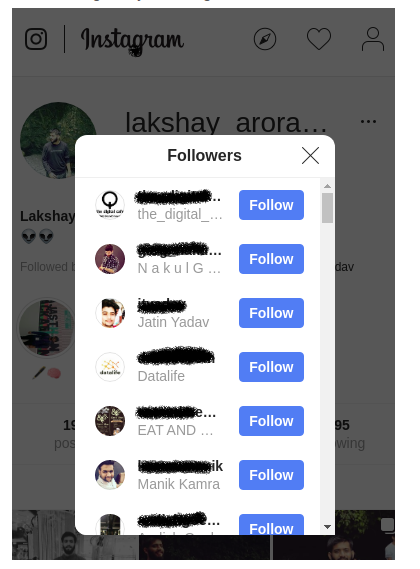

In [14]:
Image('instagram.png')

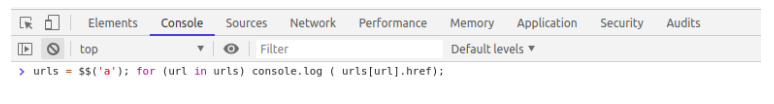

In [12]:
Image('console.png')

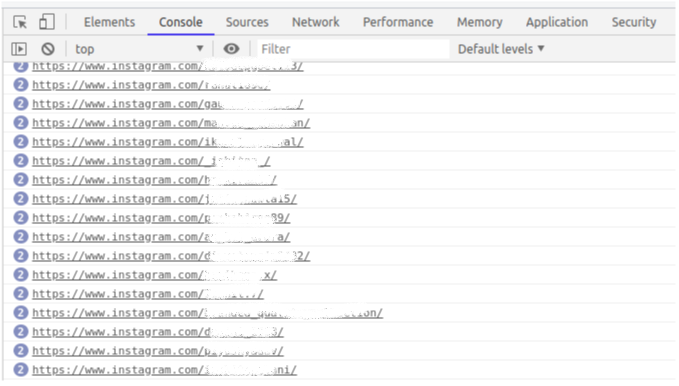

In [10]:
Image('email_scrapping.png')

In [15]:
'''
Web Scraping - URLs and Email IDs
'''
# importing required libraries
import urllib.request 
from bs4 import BeautifulSoup

# URL TO SCRAP
wiki = "https://dlca.logcluster.org/display/public/DLCA/4.1+Nepal+Government+Contact+List"
#Query the website and return the html to the variable 'page'
#For python 3 use urllib.request.urlopen(wiki)
page = urllib.request.urlopen(wiki) 

#Parse the html in the 'page' variable, and store it in Beautiful Soup format
soup = BeautifulSoup(page,features='html.parser')
print('\n\nPage Scrapped !!!\n\n')


print('\n\nTITLE OF THE PAGE\n\n')
print(soup.title.string)

print('\n\nALL THE URLs IN THE WEB PAGE\n\n')

all_links = soup.find_all('a')

print('Total number of URLs present = ',len(all_links)) 

print('\n\nLast 5 URLs in the page are : \n')

if len(all_links) > 5 :
  
  last_5 = all_links[len(all_links)-5:]
  for url in last_5 :
    print(url.get('href'))

emails = []
for url in all_links :
    if(str(url.get('href')).find('@') > 0):
        emails.append(url.get('href'))


print('\n\nTotal Number of Email IDs Present: ', len(emails))

print('\n\nSome of the emails are: \n\n')
for email in emails[:5]:
    print(email)



Page Scrapped !!!




TITLE OF THE PAGE


4.1 Nepal Government Contact List - Logistics Capacity Assessment - Digital Logistics Capacity Assessments


ALL THE URLs IN THE WEB PAGE


Total number of URLs present =  107


Last 5 URLs in the page are : 

http://www.atlassian.com/c/conf/11460
http://www.atlassian.com/software/confluence
https://support.atlassian.com/help/confluence
http://www.atlassian.com/about/connected.jsp?s_kwcid=Confluence-stayintouch
http://www.atlassian.com/


Total Number of Email IDs Present:  27


Some of the emails are: 


mailto:info@nepal.gov.np
mailto:info@moad.gov.np
mailto:info@mod.gov.np
mailto:info@mohp.gov.np
mailto:gunaso@moha.gov.np


In [16]:
"""
Web Scraping - Scrap Images
"""

# importing required libraries
import requests
from bs4 import BeautifulSoup

# target URL
url = "https://www.goibibo.com/hotels/hotels-in-shimla-ct/"

headers = {
    'User-Agent': "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36"
    }

response = requests.request("GET", url, headers=headers)

data = BeautifulSoup(response.text, 'html.parser')

# find all with the image tag
images = data.find_all('img', src=True)

print('Number of Images: ', len(images))

for image in images:
    print(image)

Number of Images:  62
<img onload="pagespeed.CriticalImages.checkImageForCriticality(this);" pagespeed_url_hash="2129554552" src="https://gos3.ibcdn.com/screen-loader-1568375554.png" style="width: auto; height: 175px; margin: 25px auto;"/>
<img onload="pagespeed.CriticalImages.checkImageForCriticality(this);" pagespeed_url_hash="753931433" src="//goibibo.ibcdn.com/styleguide/images/goLogo.png"/>
<img alt="irctc train logo" class="marginT5 marginB5" height="25px" onload="pagespeed.CriticalImages.checkImageForCriticality(this);" pagespeed_url_hash="3286845901" src="/styleguide/images/train_logo.png" width="24px"/>
<img class="fl" height="23px" onload="pagespeed.CriticalImages.checkImageForCriticality(this);" pagespeed_url_hash="1432842091" src="https://goibibo.ibcdn.com/styleguide/images/goCash-header.png" width="23px"/>
<img class="lazy" id="htl-tile-main-image-8833337098196373625" onload="pagespeed.CriticalImages.checkImageForCriticality(this);" ori="https://cdn1.goibibo.com/marina-shi

In [17]:
# select src tag
image_src = [x['src'] for x in images]

# select only jp format images
image_src = [x for x in image_src if x.endswith('.jpg')]

for image in image_src:
    print(image)

https://cdn1.goibibo.com/marina-shimla-first-designer-boutique-hotel-shimla-exterior-128415489726-jpeg-g.jpg
https://cdn1.goibibo.com/marina-shimla-first-designer-boutique-hotel-shimla-1468662608328jpg-111895410692-jpeg-r.jpg
https://cdn1.goibibo.com/marina-shimla-first-designer-boutique-hotel-shimla-exterior-128415489726-jpeg-r.jpg
https://gos3.ibcdn.com/marina-shimla-first-designer-boutique-hotel-shimla-executive-66155028197r.jpg
https://gos3.ibcdn.com/marina-shimla-first-designer-boutique-hotel-shimla-game-zone-66155011567r.jpg
https://cdn1.goibibo.com/marina-shimla-first-designer-boutique-hotel-shimla-hotel-marina-executive-bathroom_jpg-shimla-111895459508-jpeg-r.jpg
https://cdn1.goibibo.com/t_g/landmark-shimla-with-elevator-access-to-mall-road-shimla-facade-149434255080-orijgp.jpg
https://cdn1.goibibo.com/t_r/landmark-shimla-with-elevator-access-to-mall-road-shimla-interior-2-166721727495-orijgp.jpg
https://cdn1.goibibo.com/t_r/landmark-shimla-with-elevator-access-to-mall-road-shi

In [18]:
image_count = 1
for image in image_src:
    with open('image_'+str(image_count)+'.jpg', 'wb') as f:
        res = requests.get(image)
        f.write(res.content)
    image_count = image_count+1

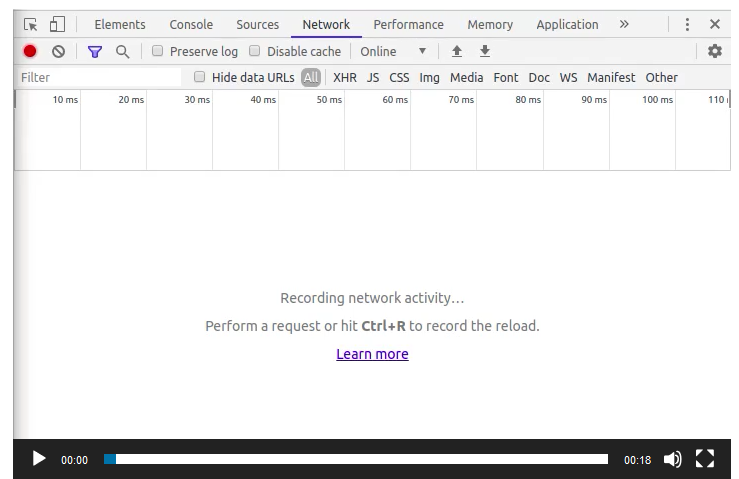

In [20]:
Image('element_network.png')

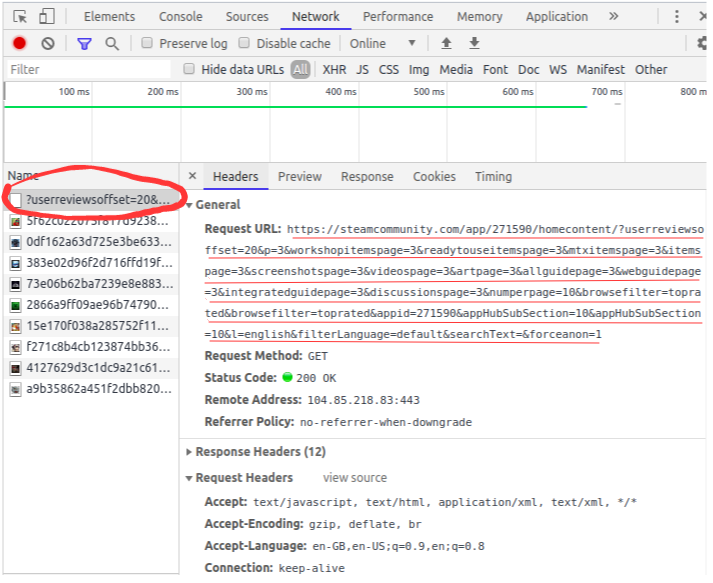

In [21]:
Image('element_networkX.png')

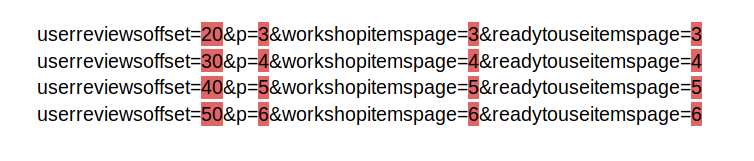

In [22]:
Image('element_net_data.png')